In [1]:
from quickga import Organism
from quickga.traits import *
from quickga.selectionstrategies import *  

import numpy as np
from matplotlib import pyplot as plt
import random

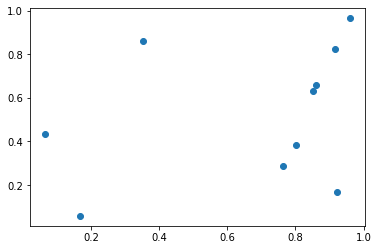

In [2]:
points = [[random.random(), random.random()] for i in range(10)]
plt.plot([p[0] for p in points], [p[1] for p in points], 'o')
plt.show()

In [3]:
class TravellingSalesman(Organism):

    def __init__(self, points):
        super().__init__(points)
        self.path = PermutationTrait(points)

    def fitness_function(self):
        d = lambda a, b: np.sqrt((a[0] - b[0]) ** 2 + (a[1] - b[1]) ** 2)
        total_distance = 1/np.sum([d(self.path[i], self.path[i-1]) for i in range(1, len(self.path))])
        return 1/total_distance

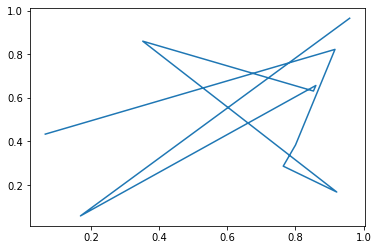

In [4]:
jeff = TravellingSalesman(points)
plt.plot([p[0] for p in jeff.path], [p[1] for p in jeff.path])
plt.show()

In [5]:
history = jeff.evolve(
    population_size=100,
    num_generations=100
)

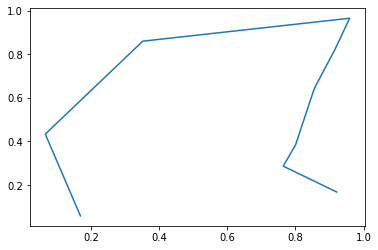

In [7]:
plt.plot([p[0] for p in jeff.path], [p[1] for p in jeff.path])
plt.show()